<a href="https://colab.research.google.com/github/BatoolAshour/KaustAcademy-Stage2-ExSolutions/blob/main/Q2_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 2: Predict Age from Face Images

You are provided with a face image dataset containing 2000 images of human faces. Your objective is to develop a regression model using PyTorch that accurately predicts the age of a person based on their face image.

You are provided with the code to download and load the dataset.

Your work will be evaluated based on the completion of the following tasks:


# 1. Load and Process Data (Provided)

### **1. Load and Process Data (Provided)**

The code below is provided for you. It:
1.  Loads images from the `images` folder.
2.  Loads labels from `labels.csv`.
3.  Splits the data into training and testing sets (`X_train`, `X_test`, `y_train`, `y_test`).

**Just run these cell to load the data.**

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammad2012191/q2-ka-ai-2026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'q2-ka-ai-2026' dataset.
Path to dataset files: /kaggle/input/q2-ka-ai-2026


In [32]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Load Labels
labels_df = pd.read_csv(os.path.join(path, "labels.csv"))
img_dir = os.path.join(path, "images")

images = []
ages = []

# Load Images and Resize
print("Loading images...")
for index, row in labels_df.iterrows():
    img_name = row.iloc[0]
    age = row.iloc[1]
    img_path = os.path.join(img_dir, img_name)

    if os.path.exists(img_path):
        img = Image.open(img_path).convert('RGB')
        img_array = np.array(img) / 255.0 # Normalize pixel values to [0, 1]
        images.append(img_array)
        ages.append(age)

X = np.array(images)
y = np.array(ages)

# Transpose image dimensions to match PyTorch format (N, C, H, W)
X = np.transpose(X, (0, 3, 1, 2))

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Loading images...
X_train shape: (1600, 3, 36, 36)
X_test shape: (400, 3, 36, 36)
y_train shape: (1600,)
y_test shape: (400,)


## **Part 1: Prepare Data for PyTorch**

**Tasks:**
1.  **Convert to Tensors:** Convert the numpy arrays (`X_train`, `X_test`, `y_train`, `y_test`) into PyTorch tensors.
2.  **Create Datasets:** Use `TensorDataset` to create `train_dataset` and `test_dataset` from the tensors.
3.  **Create DataLoaders:** Create `train_loader` and `test_loader` with a batch size of 32.
4.  **Inspect Data:** Print the shape of one batch from the train loader and
5.  **Display a few images:** Use matplotlib to display a few images.

In [33]:
# 1. Convert Numpy arrays to PyTorch Tensors
import torch

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32)




In [34]:
# 2. Create TensorDataset objects
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

sample_image, sample_label = train_dataset[0]
print(f"\n Image shape: {sample_image.shape}")
print(f"Label: {sample_label}")


 Image shape: torch.Size([3, 36, 36])
Label: 14.0


In [35]:
# 3. Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=2
)


In [36]:
# 4. Print shape of one batch

X_batch, y_batch = next(iter(train_loader))
print(f"Training batch input shape: {X_batch.shape}")
print(f"Training batch labels shape: {y_batch.shape}")

Training batch input shape: torch.Size([32, 3, 36, 36])
Training batch labels shape: torch.Size([32])


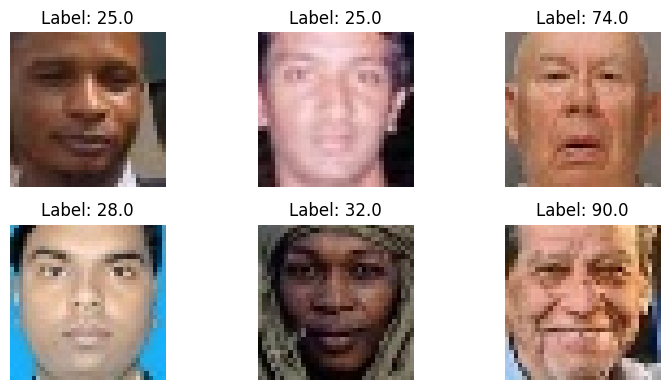

In [37]:
# 5. Display sample images
import matplotlib.pyplot as plt

# Get one batch of images and labels
images, labels = next(iter(train_loader))

# Display the first 6 images in the batch
plt.figure(figsize=(8, 4))

for i in range(6):
    plt.subplot(2, 3, i + 1)

    # Convert from (C, H, W) to (H, W, C) for matplotlib
    img = images[i].permute(1, 2, 0)

    plt.imshow(img)
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Part 2: Model

**Tasks:**

1. Create a model class with **4 linear layers**
2. Create a training loop function
3. Create a validation loop function
4. Define the device, model, loss function, and optimizer
5. Start training for **20 epochs** and track training and validation losses

In [38]:
# Task 1: Write your model class here:
import torch.nn as nn
import torch.nn.functional as F
class NN4Layer(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NN4Layer, self).__init__()


        self.layer1 = nn.Linear(input_dim, hidden_dim)


        self.layer2 = nn.Linear(hidden_dim, hidden_dim)


        self.layer3 = nn.Linear(hidden_dim, hidden_dim)


        self.layer4 = nn.Linear(hidden_dim, output_dim)


        self.relu = nn.ReLU()

    # Defines how input data flows through the network
    def forward(self, x):
        # Layer 1: TODO
        x = x.view(x.size(0), -1)
        z1 = self.layer1(x)
        a1 = self.relu(z1)

        # Layer 2 TODO
        z2 = self.layer2(a1)
        a2 = self.relu(z2)

        # Layer 3 TODO
        z3 = self.layer3(a2)
        a3 = self.relu(z3)


        # Output layer TODO
        z4 = self.layer4(a3)



        return z4

In [39]:
# Task 2: Write your training loop here:
def train_one_epoch(model, optimizer, criterion, train_loader, device):
    # Set the model to training mode
    model.train()

    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        # Move batch to the selected device
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        # Forward pass
        outputs = model(X_batch) # shape: (batch_size, 10)
        loss = criterion(outputs, y_batch)

        # Backward pass & optimization
        optimizer.zero_grad()   # Clear previous gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update model parameters

        running_loss += loss.item()

    # Average loss over all batches
    avg_loss = running_loss / len(train_loader)

    return avg_loss

In [46]:
# Task 3: Write your validation loop here:
def validate(model, criterion, test_loader, device):
    model.eval()
    running_loss = 0.0
    running_mae = 0.0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(X_batch).squeeze()

            loss = criterion(outputs, y_batch)
            mae = torch.mean(torch.abs(outputs - y_batch))

            running_loss += loss.item()
            running_mae += mae.item()

    avg_loss = running_loss / len(test_loader)
    avg_mae = running_mae / len(test_loader)

    return avg_loss, avg_mae


In [51]:
# Task 4: Define device, model, loss, optimizer:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model parameters
input_dim = 3 * 36 * 36  # Number of tabular features
hidden_dim = 128                # Design choice
output_dim = 1

# Instantiate model
model = NN4Layer(input_dim, hidden_dim, output_dim).to(device)

# Print the model architecture
print("Model Architecture:\n")
print(model)

# Calculate the total number of trainable parameters
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal trainable parameters: {total_params}")



Model Architecture:

NN4Layer(
  (layer1): Linear(in_features=3888, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=128, bias=True)
  (layer4): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

Total trainable parameters: 530945


In [52]:
# Task 5: Start training for 20 epochs:
from torch.optim import AdamW, Adam
num_epochs = 20
learning_rate = 0.001
criterion = nn.MSELoss()
optimizer = AdamW(model.parameters(), learning_rate)

In [53]:
# Run Training

train_losses = []
val_losses = []
val_accuracies = []

print('Starting Training...')
for epoch in range(num_epochs):
    # Train one epoch
    train_loss = train_one_epoch(model, optimizer, criterion, train_loader, device)

    # Validate
    val_loss, val_accuracy = validate(model, criterion, test_loader, device)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

print('Training Complete!')

Starting Training...
Epoch [5/20], Train Loss: 450.9177, Val Loss: 511.6930, Val Accuracy: 17.6181
Epoch [10/20], Train Loss: 450.6172, Val Loss: 490.7888, Val Accuracy: 17.2062
Epoch [15/20], Train Loss: 432.2836, Val Loss: 486.8225, Val Accuracy: 17.4038
Epoch [20/20], Train Loss: 424.9947, Val Loss: 495.0355, Val Accuracy: 17.1884
Training Complete!


# Part 3: Plots

**Tasks:**

1. Plot the training and validation loss over epochs
2. **Bonus:** Plot some predictions with their actual images (show predicted age vs actual age)

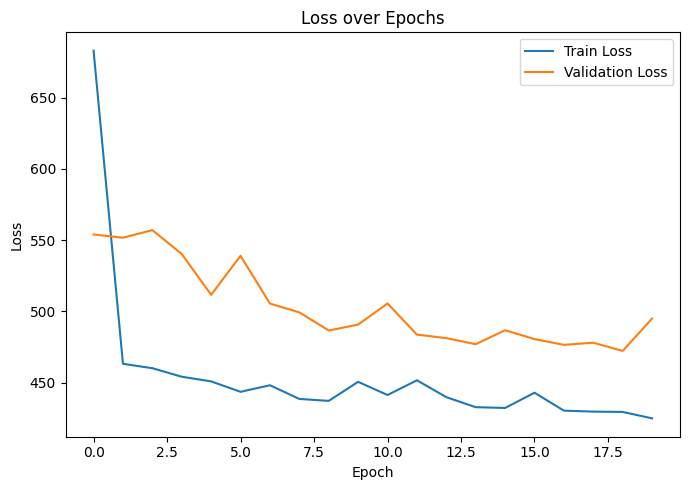

In [54]:
# Task 1: Write your code here:
plt.figure(figsize=(7, 5))

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [55]:
# Task 2 (Bonus): Write your code here:
import matplotlib.pyplot as plt

# Get one batch from test set
X_batch, y_batch = next(iter(test_loader))

X_batch = X_batch.to(device)
y_batch = y_batch.to(device)

with torch.no_grad():
    predictions = model(X_batch).squeeze()


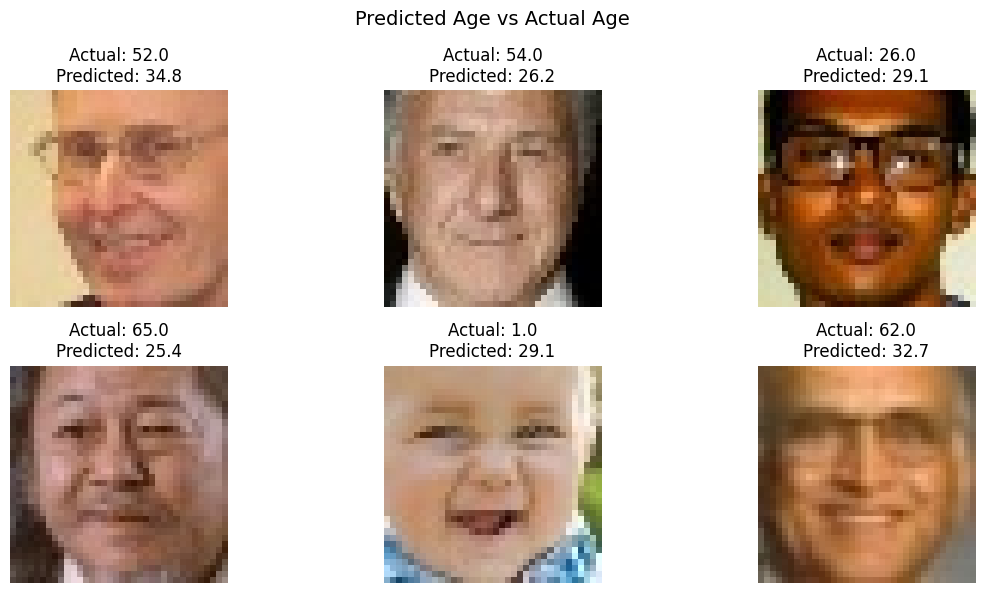

In [56]:
# Move tensors to CPU for plotting
X_batch = X_batch.cpu()
y_batch = y_batch.cpu()
predictions = predictions.cpu()

# Number of images to show
num_images = 6

plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(2, 3, i + 1)

    # Convert image from (C, H, W) → (H, W, C)
    img = X_batch[i].permute(1, 2, 0)

    plt.imshow(img)
    plt.axis('off')

    plt.title(
        f"Actual: {y_batch[i].item():.1f}\n"
        f"Predicted: {predictions[i].item():.1f}"
    )

plt.suptitle("Predicted Age vs Actual Age", fontsize=14)
plt.tight_layout()
plt.show()
